# Which one is a better plan?

We are an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

We are going to carry out a preliminary analysis of the plans based on a relatively small client selection. We'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. The job is to analyze the clients behavior and determine which prepaid plan brings in more revenue.

## Purposes of the analysis

To analyze clients behavior  based on a relatively small client selection and determine which prepaid plan brings in more revenue.

## Hypotheses

1. The average revenue from users of Ultimate and Surf calling plans differs. The Ultimate plan will result in more revenue
1. The average revenue from users in NY-NJ area differs from that of the users from other regions and brings more revenue.

Our next steps will be opening the data file and study the general information, converting the data to the necessary types, finding and eliminating errors in the data, analyzing the data and testing the hypotheses.

## Initialization

Let's load all necessary libraries we need for our analysis

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from functools import reduce

#to output more than 1 variable
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Load data

We have 5 sources of data, So first let's save them into different Dataframes

In [2]:
# Load the data files into different DataFrames
try:
    calls = pd.read_csv('/datasets/megaline_calls.csv')
except FileNotFoundError:
    calls = pd.read_csv('E:\\Израиль\\Practicum\\Project_4\\megaline_calls.csv')
try:    
    internet = pd.read_csv('/datasets/megaline_internet.csv')
except FileNotFoundError: 
    internet = pd.read_csv('E:\\Израиль\\Practicum\\Project_4\\megaline_internet.csv')
try:    
    messages = pd.read_csv('/datasets/megaline_messages.csv')
except FileNotFoundError:
     messages = pd.read_csv('E:\\Израиль\\Practicum\\Project_4\\megaline_messages.csv')
try:   
    plans = pd.read_csv('/datasets/megaline_plans.csv')
except FileNotFoundError:
    plans = pd.read_csv('E:\\Израиль\\Practicum\\Project_4\\megaline_plans.csv')
try:     
    users = pd.read_csv('/datasets/megaline_users.csv')  
except FileNotFoundError:
       users = pd.read_csv('E:\\Израиль\\Practicum\\Project_4\\megaline_users.csv')

### Explore initial data
Data contains the following columns:

The users table (data on users):
- `user_id` — unique user identifier
- `first_name` — user's name
- `last_name` — user's last name
- `age` — user's age (years)
- `reg_date` — subscription date (dd, mm, yy)
- `churn_date` — the date the user stopped using the service (if the value is missing, the calling plan was being used when this database was extracted)
- `city` — user's city of residence
- `plan` — calling plan name

The calls table (data on calls):
- `id` — unique call identifier
- `call_date` — call date
- `duration` — call duration (in minutes)
- `user_id` — the identifier of the user making the call

The messages table (data on texts):
- `id` — unique text message identifier
- `message_date` — text message date
- `user_id` — the identifier of the user sending the text

The internet table (data on web sessions):
- `id` — unique session identifier
- `mb_used` — the volume of data spent during the session (in megabytes)
- `session_date` — web session date
- `user_id` — user identifier

The plans table (data on the plans):
- `plan_name` — calling plan name
- `usd_monthly_fee` — monthly charge in US dollars
- `minutes_included` — monthly minute allowance
- `messages_included` — monthly text allowance
- `mb_per_month_included` — data volume allowance (in megabytes)
- `usd_per_minute` — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
- `usd_per_message` — price per text after exceeding the package limits
- `usd_per_gb` — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

## Prepare the data

The data is split into several tables. Let's explore each one to get an initial understanding of the data. 

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


we have just 2 rows but everything is fine. No missing values, correct types of the columns. There is no issues

### Plans discription

#### Surf
Monthly charge: $20, included:<br>
500 monthly minutes, 50 texts, and 15 GB of data

After exceeding the package limits:<br>
1. minute: 3 cents
1. text message: 3 cents
1. GB of data: $10

#### Ultimate
Monthly charge: $70, included:<br>
3000 monthly minutes, 1000 text messages, and 30 GB of data

After exceeding the package limits:<br>
1. minute: 1 cent
1. text message: 1 cent
1. GB of data: $7

We can see that we have `mb_per_month_included` column, but we will evaluate the Gb usage, let's rename and recalculate this column

In [5]:
#Creating the column `gb_per_month_inclueded`
plans['mb_per_month_included'] = plans['mb_per_month_included']/1024
plans = plans.rename(columns = {'mb_per_month_included':'gb_per_month_included'})

#Check the table
plans

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


 Looks fine. It will be easier to calculate the revenue.

## Users

In [6]:
# Print the general/summary information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Print a sample of data for users
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


We have no problems with columns names. Age column has int type, that's good. We have `churn_date` column consisting mostly from missing values, but that is because theese clients did not stop the service. So we replace the missing values with "None". We have to change also the type of the `reg_date` and `churn_date` columns to the date - time type in order to work with them later. And also we are going to evaluate dependence of the clients behavior on region. Let' divide `city` column into 2 columns and split them creating the new `region` column all we have after comma. Let's fix the issues

### Fix Data

Fix obvious issues described above with the data given the initial observations.

In [8]:
#Changing types of `reg_date` and `chunk_date` to date time 
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users[users['churn_date'].notnull()]['churn_date'], format ='%Y-%m-%d')

#Replacing missing values
users.fillna('None', inplace=True)

#Splitting the `city` column and creating the `region` column
users[['city', 'region']]=users['city'].str.split(',', expand = True)
#Check if it works
users.info()
type(users.loc[6, 'churn_date'])
users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
 8   region      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 35.3+ KB


pandas._libs.tslibs.timestamps.Timestamp

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,region
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,None,GA MSA
1,1001,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,None,WA MSA
2,1002,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,None,NV MSA
3,1003,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,None,OK MSA
4,1004,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,2018-05-23,surf,None,WA MSA
5,1005,Livia,Shields,31,Dallas-Fort Worth-Arlington,2018-11-29,surf,None,TX MSA
6,1006,Jesusa,Bradford,73,San Francisco-Oakland-Berkeley,2018-11-27,ultimate,2018-12-18 00:00:00,CA MSA
7,1007,Eusebio,Welch,42,Grand Rapids-Kentwood,2018-07-11,surf,None,MI MSA
8,1008,Emely,Hoffman,53,Orlando-Kissimmee-Sanford,2018-08-03,ultimate,None,FL MSA
9,1009,Gerry,Little,19,San Jose-Sunnyvale-Santa Clara,2018-04-22,surf,None,CA MSA


We have successfully changed types of `reg_date` and `churn_date` cilumns. We have also replaced the missing values. We checked that all date values have appropriate type in `churn_date` column as there are also string values, the rype of the whole column is object, but types of the values where we have a date value is datetime. And finaly we created the region column for future analtsis. Everything is OK. 

## Calls

In [9]:
# Print the general/summary information about the calls' DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Print a sample of data for calls
calls.head(10)


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


Here we have good data. No missing values, `duration` is float and `user_id` is int as we have in the users table. So we need just to change the type of `call_date` column to datetime type. And one more thing. According to our policy the calls are charged for full minute, even if duration was just couple of seconds. So we need th round up the duration column to full minutes.

### Fix data

Fix obvious issues with the data given the initial observations.

In [11]:
#Changing type of the `call_date` column
calls['call_date']=pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

#Round up `duration` column
calls['duration'] = np.ceil(calls['duration']).astype(int)

#Check everuthing is fine
calls.info()
calls.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 3.7+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


### Enrich data

In order to evaluate the cost of the tariffs we need to determine  the number of minutes for each user per month. We have data on each call, let's add the year and month columns for future analysis.

In [12]:
#Adding year and month columns
calls['year'] = calls['call_date'].dt.year
calls['month'] = calls['call_date'].dt.month

#Checking that everything is good
calls.head(10)

calls['year'].unique()
calls['month'].unique()

,id,user_id,call_date,duration,year,month
0,1000_93,1000,2018-12-27,9,2018,12
1,1000_145,1000,2018-12-27,14,2018,12
2,1000_247,1000,2018-12-27,15,2018,12
3,1000_309,1000,2018-12-28,6,2018,12
4,1000_380,1000,2018-12-30,5,2018,12
5,1000_388,1000,2018-12-31,3,2018,12
6,1000_510,1000,2018-12-27,6,2018,12
7,1000_521,1000,2018-12-28,15,2018,12
8,1000_530,1000,2018-12-28,6,2018,12
9,1000_544,1000,2018-12-26,5,2018,12


array([2018], dtype=int64)

array([12,  9, 10, 11,  8,  7,  6,  5,  3,  4,  2,  1], dtype=int64)

We got all the information we need in order to avaluate the cost of tarriffs for calls. For every user we now have the average month duration of calls. We will use this info in order to avaluate the cost of the plans. We have the information for the whole 2018 year. So we can just use months in our analysis

## Messages

In [13]:
# Print the general/summary information about the messages' DataFrame
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
# Print a sample of data for messages
messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


Everything is good, no missing values, `user_id` column is int as in other tables. All we need to do just to change the type of the date to datetime format. Let's do this.

### Fix data

Fix obvious issues with the data given the initial observations.

In [15]:
#Changing type of the `message_date` column
messages['message_date']=pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

#Check everuthing is fine
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enrich data

In order  to calculate the number of messages per month let's add `year` and `month` columns to the table as we did with calls table

In [16]:
#Adding year and month columns
messages['year'] = messages['message_date'].dt.year
messages['month'] = messages['message_date'].dt.month

#Checking that everything is good
messages.head(10)

messages['year'].unique()
messages['month'].unique()

,id,user_id,message_date,year,month
0,1000_125,1000,2018-12-27,2018,12
1,1000_160,1000,2018-12-31,2018,12
2,1000_223,1000,2018-12-31,2018,12
3,1000_251,1000,2018-12-27,2018,12
4,1000_255,1000,2018-12-26,2018,12
5,1000_346,1000,2018-12-29,2018,12
6,1000_386,1000,2018-12-30,2018,12
7,1000_413,1000,2018-12-31,2018,12
8,1000_502,1000,2018-12-27,2018,12
9,1000_525,1000,2018-12-28,2018,12


array([2018], dtype=int64)

array([12, 11,  8, 10,  9,  6,  7,  5,  4,  3,  2,  1], dtype=int64)

We got the same picture as we had with calls table. That's fine.

## Internet

In [17]:
# Print the general/summary information about the internet DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [18]:
# Print a sample of data for the internet traffic
internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


Everything is good, no missing values, `user_id` column is int type as in other tables. All we need to do just to change the type of the date to datetime format. Let's do this.

### Fix data

Fix obvious issues with the data given the initial observations.

In [19]:
#Changing type of the `session_date` column
internet['session_date']=pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

#Check everuthing is fine
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enrich data

We'll add the year and month columns and check the data after that as we did for calls and messages tables

In [20]:
#Adding year and month columns
internet['year'] = internet['session_date'].dt.year
internet['month'] = internet['session_date'].dt.month

#Checking that everything is good
internet.head(10)

internet['year'].unique()
internet['month'].unique()

,id,user_id,session_date,mb_used,year,month
0,1000_13,1000,2018-12-29,89.86,2018,12
1,1000_204,1000,2018-12-31,0.00,2018,12
2,1000_379,1000,2018-12-28,660.40,2018,12
3,1000_413,1000,2018-12-26,270.99,2018,12
4,1000_442,1000,2018-12-27,880.22,2018,12
5,1001_0,1001,2018-08-24,284.68,2018,8
6,1001_3,1001,2018-12-09,656.04,2018,12
7,1001_4,1001,2018-11-04,16.97,2018,11
8,1001_10,1001,2018-11-27,135.18,2018,11
9,1001_15,1001,2018-12-13,761.92,2018,12


array([2018], dtype=int64)

array([12,  8, 11, 10,  9,  7,  6,  5,  3,  4,  2,  1], dtype=int64)

So our data is correct. We have all the values for the whole 2018 year and we can use only month column to calculate usage of the services per month as all the data is of 2018 year

## Study plan conditions

It is critical to understand how the plans work, how users are charged based on their plan subscription. So, let's print out the plan information to view their conditions once again.

In [21]:
# Print out the plan conditions and make sure they are clear for you
plans


,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


Let's Discribe the process of the cost per month for a client

First, we have constant fee for both plans: 20 usd for surf plan and 70 usd for ultimate. <br> Then we look at the calls. We have 500 calls included for surf plan and 3000 calls for ultimate plan. All minutes above this level will be subject to additional cost 0.03 usd per minute for surf plan and 0.01 usd for ultimate. <br> Let's look at the number of messages. We have 50 included messages for surf plan and 1000 for ultimate. All messages more than this will be subject to additional fee. The cost is the same as per additional minute of a call.<br> And finally we will use the same approach to calculate the cost of nternet use. We have 15Gb included in surf plan aand 30Gb included in ultimate plan. All usage above this level will be subject to additional fee. 10 usd for 1Gb for Surf plan and 7 usd for ultimate.

Usually the plans where not may servises are included in monthly charge are more expensive for the clients in evarage, but we will check this later.

## Aggregate data per user

Now, as the data is clean, let's aggregate data per user per period in order to have just one record per user per month. It should ease the further analysis a lot.

In [22]:
# Calculate the number of calls made by each user per month. Save the result.
calls_num = calls.groupby(['user_id', 'month'])['duration'].count().reset_index()
calls_num


,user_id,month,duration
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [23]:
# Calculate the amount of minutes spent by each user per month. Save the result.
calls_minutes = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()

#Renaming column `duration` to `calls_dur`
calls_minutes.rename(columns = {'duration':'calls_dur'}, inplace=True)
calls_minutes

,user_id,month,calls_dur
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


In [24]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_sum = messages.groupby(['user_id', 'month'])['id'].count().reset_index()

#Renaming the column `id` to `messages`
messages_sum.rename(columns = {'id':'messages'}, inplace = True)
messages_sum

,user_id,month,messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [25]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_sum = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
internet_sum

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


Let's put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month. In order not to loose any piece of the data, we will perform outer merge. After the merging we will add plan information for every user and replace missing values with 0 value. It will make our calculations easier. We will also add region information for users in purposes of testing our hypotheses.

In [26]:
# Merge the data for calls duration, messages, internet based on user_id and month
data_frames = [calls_minutes, messages_sum, internet_sum]
data = reduce(lambda left, right: pd.merge(left, right, on = ['user_id', 'month'], how = 'outer'), data_frames)
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    2293 non-null   int64  
 1   month      2293 non-null   int64  
 2   calls_dur  2258 non-null   float64
 3   messages   1806 non-null   float64
 4   mb_used    2277 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 107.5 KB


,user_id,month,calls_dur,messages,mb_used
0,1000,12,124.0,11.0,1901.47
1,1001,8,182.0,30.0,6919.15
2,1001,9,315.0,44.0,13314.82
3,1001,10,393.0,53.0,22330.49
4,1001,11,426.0,36.0,18504.30
5,1001,12,412.0,44.0,19369.18
6,1002,10,59.0,15.0,6552.01
7,1002,11,386.0,32.0,19345.08
8,1002,12,384.0,41.0,14396.24
9,1003,12,1104.0,50.0,27044.14


According to our polycy we will take charge for whole gigabytes per month. So, let's calculate the gigabytes and then we will round up gigabytes per month. But first we need to replace the missing values with 0 value. We do not have all the info for every single user. Some of them are using just a part of our sevices

In [27]:
#Replacing missing values
data.fillna(0, inplace=True)

#Creating `gb_used` column
data['gb_used'] = np.ceil(data['mb_used']/1024).astype(int)
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    2293 non-null   int64  
 1   month      2293 non-null   int64  
 2   calls_dur  2293 non-null   float64
 3   messages   2293 non-null   float64
 4   mb_used    2293 non-null   float64
 5   gb_used    2293 non-null   int32  
dtypes: float64(3), int32(1), int64(2)
memory usage: 116.4 KB


,user_id,month,calls_dur,messages,mb_used,gb_used
0,1000,12,124.0,11.0,1901.47,2
1,1001,8,182.0,30.0,6919.15,7
2,1001,9,315.0,44.0,13314.82,14
3,1001,10,393.0,53.0,22330.49,22
4,1001,11,426.0,36.0,18504.30,19
5,1001,12,412.0,44.0,19369.18,19
6,1002,10,59.0,15.0,6552.01,7
7,1002,11,386.0,32.0,19345.08,19
8,1002,12,384.0,41.0,14396.24,15
9,1003,12,1104.0,50.0,27044.14,27


In [28]:
# Add the plan information
data['plan_name'] = data.user_id.map(users.set_index('user_id')['plan'])

#Add region information
data['region'] = data.user_id.map(users.set_index('user_id')['region'])
data

,user_id,month,calls_dur,messages,mb_used,gb_used,plan_name,region
0,1000,12,124.0,11.0,1901.47,2,ultimate,GA MSA
1,1001,8,182.0,30.0,6919.15,7,surf,WA MSA
2,1001,9,315.0,44.0,13314.82,14,surf,WA MSA
3,1001,10,393.0,53.0,22330.49,22,surf,WA MSA
4,1001,11,426.0,36.0,18504.30,19,surf,WA MSA
...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,61.0,13039.91,13,surf,MA-NH MSA
2289,1361,5,0.0,2.0,1519.69,2,surf,AL MSA
2290,1482,10,0.0,2.0,0.00,0,ultimate,NY-NJ-PA MSA
2291,1108,12,0.0,0.0,233.17,1,ultimate,UT MSA


Let's calculate the monthly revenue from each user. We will write the function and do the following:

1. Subtract the free package limit from the total number of calls, text messages, and data; 
1. Multiply the result by the calling plan value;
1. Add the monthly charge depending on the calling plan

In [29]:
#Calculating the monthly revenue through the function
# Calculate the monthly revenue for additional minutes
def revenue(row):
    tarriff = row['plan_name']
    month_pay = plans[plans['plan_name']==tarriff]['usd_monthly_pay'].iloc[0]

#Calcilating additional call pay    
    minutes = row['calls_dur']
    minutes_inc = plans[plans['plan_name']==tarriff]['minutes_included'].iloc[0]
    minutes_fee = plans[plans['plan_name']==tarriff]['usd_per_minute'].iloc[0]
        
    minutes_add = minutes - minutes_inc
    if minutes_add <0:
        minutes_cost = 0
    else:
        minutes_cost = minutes_add * minutes_fee
    
#Calcilating additional message pay    
    messages = row['messages']
    messages_inc = plans[plans['plan_name']==tarriff]['messages_included'].iloc[0]
    messages_fee = plans[plans['plan_name']==tarriff]['usd_per_message'].iloc[0]
        
    messages_add = messages - messages_inc
    if messages_add <0:
        messages_cost = 0
    else:
        messages_cost = messages_add * messages_fee

#Calcilating additional internet pay    
    internet = row['gb_used']
    internet_inc = plans[plans['plan_name']==tarriff]['gb_per_month_included'].iloc[0]
    internet_fee = plans[plans['plan_name']==tarriff]['usd_per_gb'].iloc[0]
        
    internet_add = internet - internet_inc
    if internet_add <0:
        internet_cost = 0
    else:
        internet_cost = internet_add * internet_fee    
    
#Calculating total cost per month    
    cost  = minutes_cost + messages_cost + internet_cost + month_pay
    return cost

#Applying the fuction in order to calculate monthly revenue
data['revenue_month'] = data.apply(revenue, axis = 1)
data.head(10)

,user_id,month,calls_dur,messages,mb_used,gb_used,plan_name,region,revenue_month
0,1000,12,124.0,11.0,1901.47,2,ultimate,GA MSA,70.00
1,1001,8,182.0,30.0,6919.15,7,surf,WA MSA,20.00
2,1001,9,315.0,44.0,13314.82,14,surf,WA MSA,20.00
3,1001,10,393.0,53.0,22330.49,22,surf,WA MSA,90.09
4,1001,11,426.0,36.0,18504.30,19,surf,WA MSA,60.00
5,1001,12,412.0,44.0,19369.18,19,surf,WA MSA,60.00
6,1002,10,59.0,15.0,6552.01,7,surf,NV MSA,20.00
7,1002,11,386.0,32.0,19345.08,19,surf,NV MSA,60.00
8,1002,12,384.0,41.0,14396.24,15,surf,NV MSA,20.00
9,1003,12,1104.0,50.0,27044.14,27,surf,OK MSA,158.12


## Study user behaviour

Let's Calculate descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. We will draw plots to help the understanding. The main task is to compare the plans and decide on which one is more profitable, so, the statistics and the plots will be calculated on a per-plan basis.

### Calls

<AxesSubplot:xlabel='month'>

Text(0.5, 1.0, 'Duration of calls per months')

Text(0, 0.5, 'min')

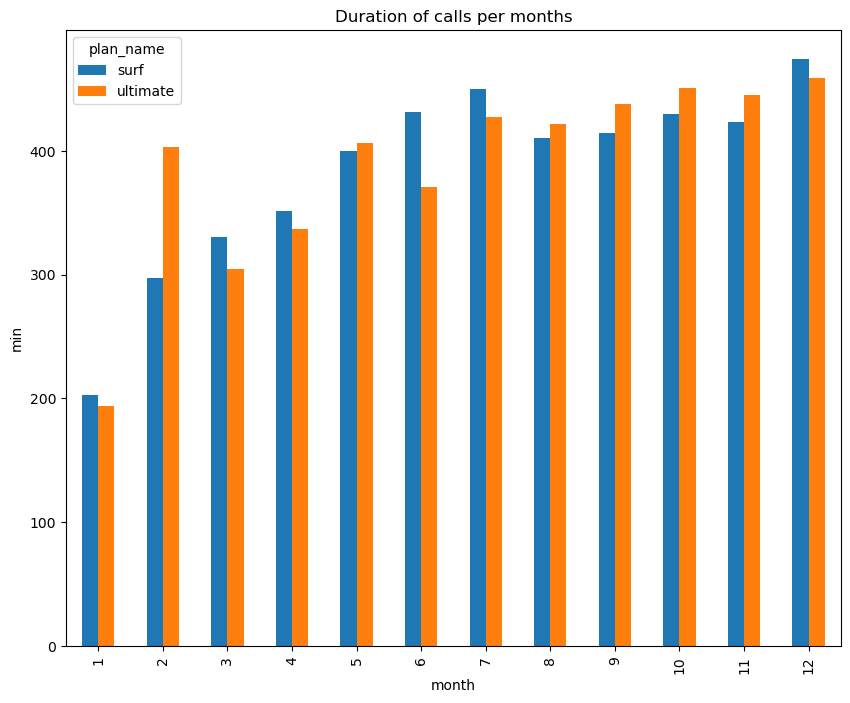

In [30]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
calls_avg =data.pivot_table(index = 'plan_name', columns = 'month', values = 'calls_dur', aggfunc = 'mean')
calls_avg.T.plot(figsize = (10,8), kind = 'bar')
plt.title('Duration of calls per months')
plt.ylabel('min')

We see that there are differences not only in distribution. The mean duration of calls depends on months. From January to July people with surf plan spent more time on their phones exept February where people use Ultimate Plan much more than Surf Plan. In the second part of a year Ultimate plan is leading except December where Surf plan is slightly ahead of Ultimate. But the most important is that **the mean duration of calls per month does not exceed the level od 500 minutes.** That means that **people in average will not pay additional fee per calls**, all minutes are included in the plan they have. It seems that 3000 minutes included in Ultimate plan is much more than people are actually spent calling by their phones.

<AxesSubplot:xlabel='calls_dur', ylabel='Count'>

<AxesSubplot:xlabel='calls_dur', ylabel='Count'>

Text(0.5, 0, 'Duration of calls')

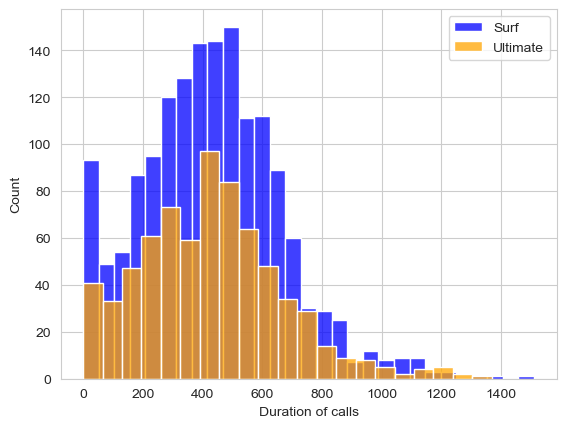

In [31]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
#Dividing data into 2 groups for each plan
data_surf = data.query('plan_name == "surf"').reset_index()
data_ultimate = data.query('plan_name == "ultimate"').reset_index()

#Plotting histograms
sns.set_style("whitegrid")
sns.histplot(data = data_surf['calls_dur'], label = 'Surf', color = 'blue')
sns.histplot(data= data_ultimate['calls_dur'], label = 'Ultimate', color = 'orange')
plt.legend()
plt.xlabel('Duration of calls')

We see that there are more users with Surf plan, but the mean duration per month is about 400 minutes for both plans. Let's check this and Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.

In [32]:
# Calculate the mean and the variance of the monthly call duration
print('Mean duration of calls per month for Surf plan is', np.mean(data_surf['calls_dur']), 
      'Variance is', np.var(data_surf['calls_dur']))
print('Mean duration of calls per month for Ultimate plan is', np.mean(data_ultimate['calls_dur']), 
      'Variance is', np.var(data_ultimate['calls_dur']))


Mean duration of calls per month for Surf plan is 428.7495232040687 Variance is 54933.33459131747
Mean duration of calls per month for Ultimate plan is 430.45 Variance is 57764.12527777776


<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'Surf')

Text(0.5, 1.0, 'Ultimate')

(0.0, 1400.0)

(0.0, 1400.0)

Text(0.0, 0.5, 'Duration of calls, minutes')

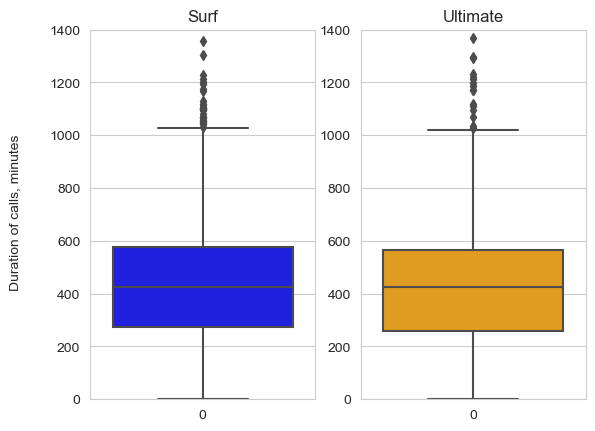

In [33]:
# Plot a boxplot to visualize the distribution of the monthly call duration

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
sns.boxplot(data=data_surf['calls_dur'], color='blue',ax=ax1)
sns.boxplot(data=data_ultimate['calls_dur'], color='orange',ax=ax2)
ax1.set_title('Surf')
ax2.set_title('Ultimate')
ax1.set_ylim(0, 1400)
ax2.set_ylim(0, 1400)
fig.text(0.0, 0.5, 'Duration of calls, minutes', va='center', rotation='vertical')


So, we see, that behaviour of users of different plans is almost the same. The average duraton of calls per month is about 430 min, we have almost the same variation about 56000, but we see that there is much more users who prefer Surf plan, it means it will bring us more revenue because there are much less sevices included and the price for additional services is much higher.

Let's look at messages.

### Messages

<AxesSubplot:xlabel='month'>

Text(0.5, 1.0, 'Mean number of messages per month')

Text(0, 0.5, 'count')

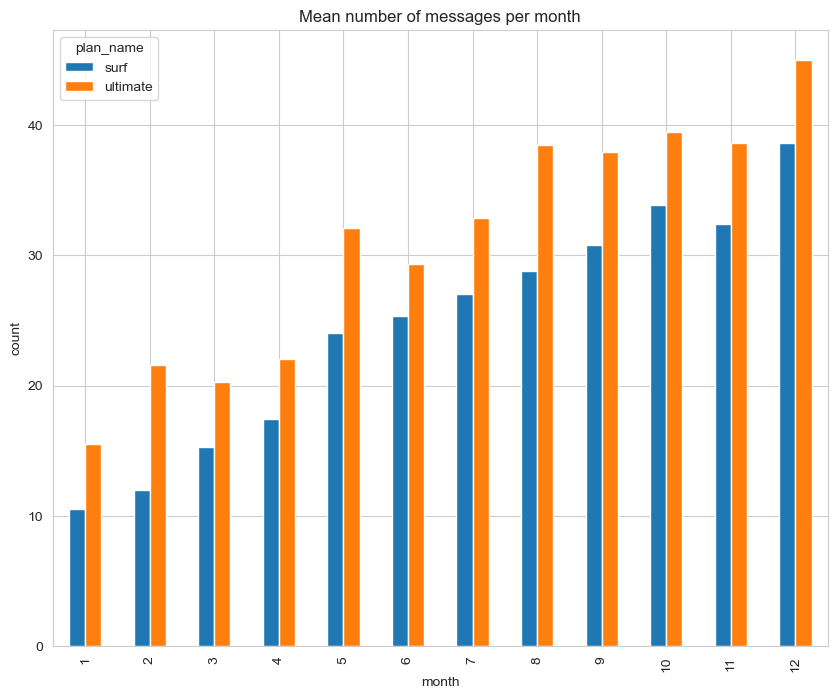

In [34]:
# Compare the average number of messages per each plan per each distinct month. Plot a bar plat to visualize it.
messages_avg =data.pivot_table(index = 'plan_name', columns = 'month', values = 'messages', aggfunc = 'mean')
messages_avg.T.plot(figsize = (10,8), kind = 'bar')
plt.title('Mean number of messages per month')
plt.ylabel('count')



Here Surf plan is leading, and the total number of messages is increasing through the year. Great work of Mrketing department.

<AxesSubplot:xlabel='messages', ylabel='Count'>

<AxesSubplot:xlabel='messages', ylabel='Count'>

Text(0.5, 0, 'Number of messages')

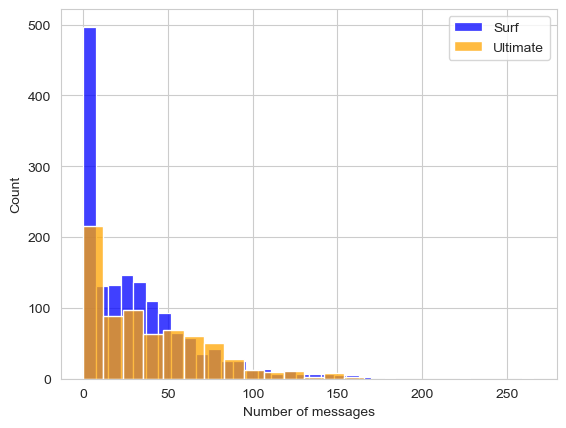

In [35]:
# Compare the number of users messages of each plan require each month. Plot a histogram.

#Plotting histograms
sns.set_style("whitegrid")
sns.histplot(data = data_surf['messages'], label = 'Surf', color = 'blue')
sns.histplot(data= data_ultimate['messages'], label = 'Ultimate', color = 'orange')
plt.legend()
plt.xlabel('Number of messages')



We see that there is a lot of surf users who do not use messages, it seems that the mean of ultimate plan is higher than the mean of Surf plan. Let's check this

In [36]:
# Calculate the mean and the variance of the monthly number of messages
print('Mean number of messages per month for Surf plan is', np.mean(data_surf['messages']), 
      'Variance is', np.var(data_surf['messages']))
print('Mean number of messages per month for Ultimate plan is', np.mean(data_ultimate['messages']), 
      'Variance is', np.var(data_ultimate['messages']))

Mean number of messages per month for Surf plan is 31.15956770502225 Variance is 1126.0082317266633
Mean number of messages per month for Ultimate plan is 37.55138888888889 Variance is 1207.0779147376504


The difference in distribution of messages is bigger than what we saw in calls.

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'Surf')

Text(0.5, 1.0, 'Ultimate')

(0.0, 270.0)

(0.0, 270.0)

Text(0.0, 0.5, 'Number of messages')

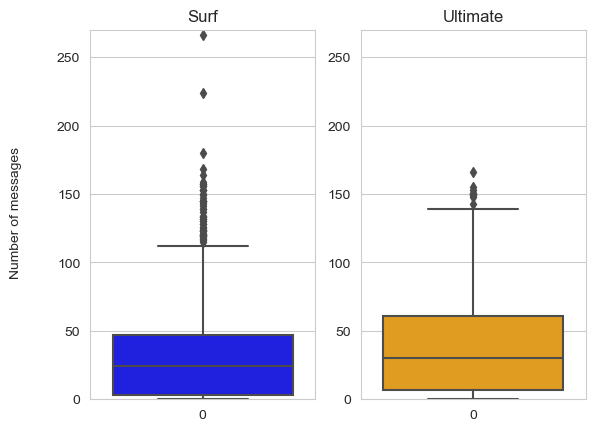

In [37]:
# Plot a boxplot to visualize the distribution of the monthly messages

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
sns.boxplot(data=data_surf['messages'], color='blue',ax=ax1)
sns.boxplot(data=data_ultimate['messages'], color='orange',ax=ax2)
ax1.set_title('Surf')
ax2.set_title('Ultimate')
ax1.set_ylim(0, 270)
ax2.set_ylim(0, 270)
fig.text(0.0, 0.5, 'Number of messages', va='center', rotation='vertical')

Here we see some kind of the different distribution. Ultimate users use messages more often but their number per month does not exceed 200. So, they are all inclueded in monthely fee. Some Surf users have more than 50 messages per month and they are subject to additional fee. Their number is not so big, less than 25% of the total users of that plan.

Now we look at the internet part of our revenue.

### Internet

<AxesSubplot:xlabel='month'>

Text(0.5, 1.0, 'Mean internet use per month')

Text(0, 0.5, 'Gb')

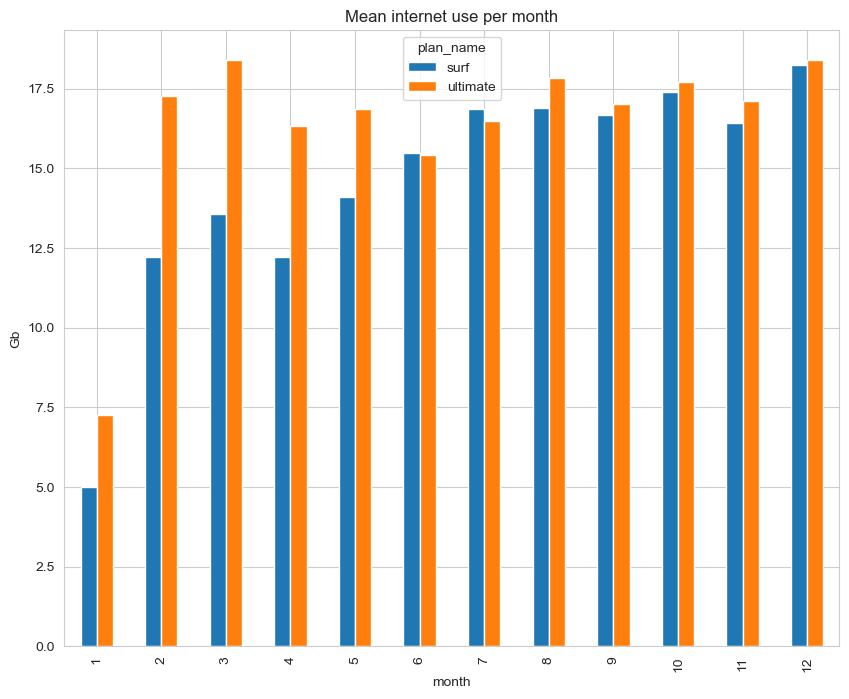

In [38]:
# Compare the average gigabytes per each plan per each distinct month. Plot a bar plat to visualize it.
internet_avg =data.pivot_table(index = 'plan_name', columns = 'month', values = 'gb_used', aggfunc = 'mean')
internet_avg.T.plot(figsize = (10,8), kind = 'bar')
plt.title('Mean internet use per month')
plt.ylabel('Gb')

Almost in every month Ultimate clients use more internet, but in everage not more than 18Gb per month. So, again it is inclueded in monthely fee. Surf clients use more than 15Gb per month and we are going to receive more revenue for that.

<AxesSubplot:xlabel='gb_used', ylabel='Count'>

<AxesSubplot:xlabel='gb_used', ylabel='Count'>

Text(0.5, 0, 'Internet (Gb)')

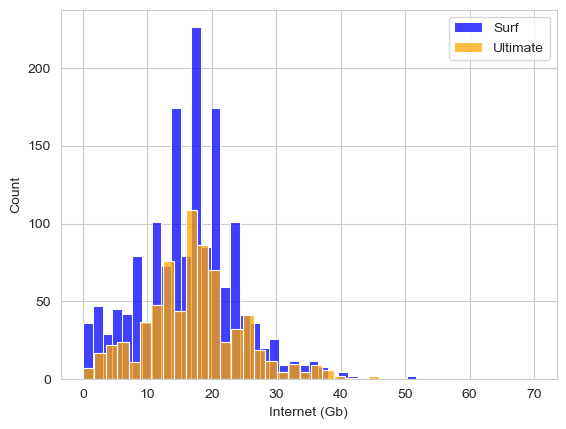

In [39]:
# Compare the volume of Internet of each plan require each month. Plot a histogram.

#Plotting histograms
sns.set_style("whitegrid")
sns.histplot(data = data_surf['gb_used'], label = 'Surf', color = 'blue')
sns.histplot(data= data_ultimate['gb_used'], label = 'Ultimate', color = 'orange')
plt.legend()
plt.xlabel('Internet (Gb)')

Looks interesting. Almost standard distribution. We can guess that variance and mean are almost the same, let's check this.

In [40]:
# Calculate the mean and the variance of the monthly internet
print('Mean Gb used per month for Surf plan is', np.mean(data_surf['gb_used']), 
      'Variance is', np.var(data_surf['gb_used']))
print('Mean Gb used per month for Ultimate plan is', np.mean(data_ultimate['gb_used']), 
      'Variance is', np.var(data_ultimate['gb_used']))

Mean Gb used per month for Surf plan is 16.670692943420217 Variance is 61.544449424470294
Mean Gb used per month for Ultimate plan is 17.306944444444444 Variance is 58.748840663580175


Yes, the distributon is even closer than we saw in calls. And very small varience. So Internet is the most part of the revenue in Surf users, becase many of them use more than 15 Gb. Ultimate users do not exceed the level of 30Gb per month in average. Let's look at the boxplots.

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'Surf')

Text(0.5, 1.0, 'Ultimate')

(0.0, 75.0)

(0.0, 75.0)

Text(0.0, 0.5, 'Internet use, Gb')

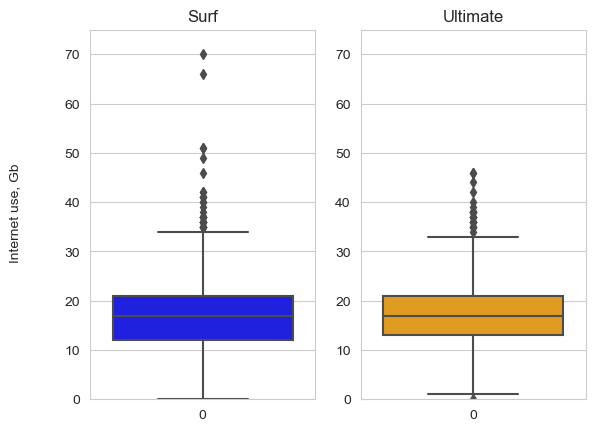

In [41]:
# Plot a boxplot to visualize the distribution of the monthly internet

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
sns.boxplot(data=data_surf['gb_used'], color='blue',ax=ax1)
sns.boxplot(data=data_ultimate['gb_used'], color='orange',ax=ax2)
ax1.set_title('Surf')
ax2.set_title('Ultimate')
ax1.set_ylim(0, 75)
ax2.set_ylim(0, 75)
fig.text(0.0, 0.5, 'Internet use, Gb', va='center', rotation='vertical')

Box plots proved our conclusions above, Surf clients use internet even more than Ultimate clients. We are going to receive more revenue from the Surf plan. In average the use of internet doesn't depend much on plans. All the people use almost the same amount of internet.

Let's analize the monthely revenue.

## Revenue

Likewise we have studied the user behaviour, now let's describe the revenue between the plans statistically.

<AxesSubplot:xlabel='month'>

Text(0.5, 1.0, 'Mean revenue per month')

Text(0, 0.5, 'usd')

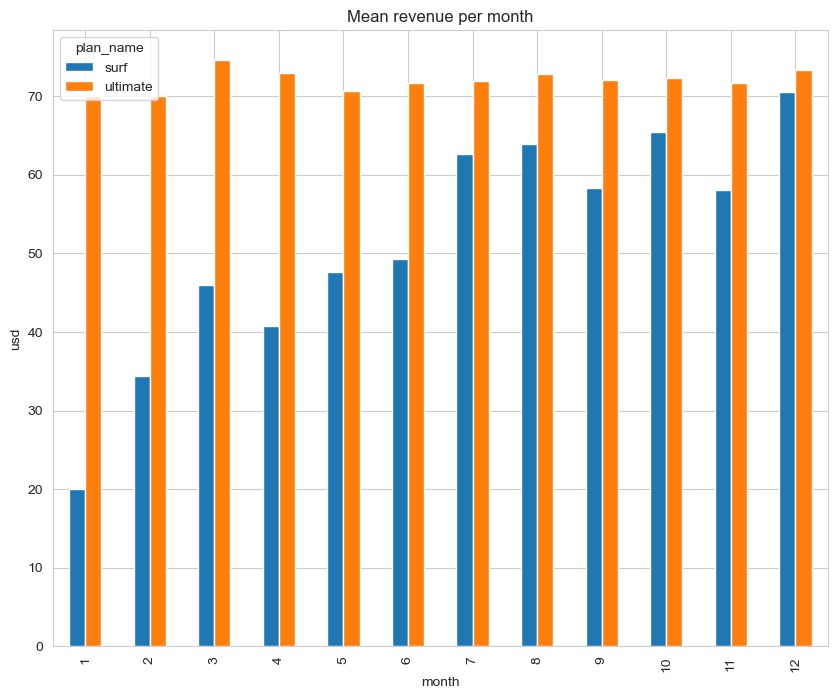

In [42]:
# Compare the monthly revenue per each plan per each distinct month. Plot a bar plat to visualize it.
revenue_avg =data.pivot_table(index = 'plan_name', columns = 'month', values = 'revenue_month', aggfunc = 'mean')
revenue_avg.T.plot(figsize = (10,8), kind = 'bar')
plt.title('Mean revenue per month')
plt.ylabel('usd')

We see that Ultimate plan revenue is higher in every month. The reason is monthely pay. It is much higher 70 usd versus 20 usd in Surf plans. Though almost all services are inclueded, but the fee level is more then 3 times higher. It is the key factor.

Let's look at other statistics

<AxesSubplot:xlabel='revenue_month', ylabel='Count'>

<AxesSubplot:xlabel='revenue_month', ylabel='Count'>

Text(0.5, 0, 'Revenue in usd')

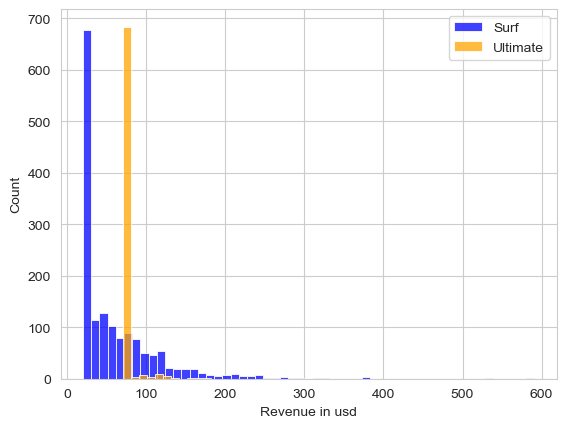

In [43]:
# Compare the revenue of each plan per month. Plot a histogram.

#Plotting histograms
sns.set_style("whitegrid")
sns.histplot(data = data_surf['revenue_month'], label = 'Surf', color = 'blue')
sns.histplot(data= data_ultimate['revenue_month'], label = 'Ultimate', color = 'orange')
plt.legend()
plt.xlabel('Revenue in usd')

Huge differences in means obviousely because of the monthly pay, almost zero additional fees in Ultimate plan and many of them in Surf plan.

In [44]:
# Calculate the mean and the variance of the monthly revenue
print('Mean revenue per month for Surf plan is', np.mean(data_surf['revenue_month']), 
      'Variance is', np.var(data_surf['revenue_month']))
print('Mean revenue per month for Ultimate plan is', np.mean(data_ultimate['revenue_month']), 
      'Variance is', np.var(data_ultimate['revenue_month']))

Mean revenue per month for Surf plan is 60.70640813731715 Variance is 3065.8848438690225
Mean revenue per month for Ultimate plan is 72.31388888888888 Variance is 129.66814043209837


Statistics give us completely different distribution of revenues for Surf and Ultimate plans rather big variance of Surf plan due to additional fees, but the mean of Surf plan is still lower due to big difference (more than 3 times) of Monthly pay.

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'Surf')

Text(0.5, 1.0, 'Ultimate')

Text(0.0, 0.5, 'Monthly revenue, usd')

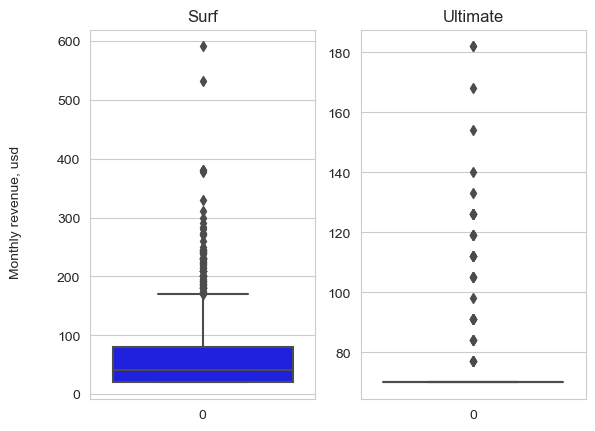

In [45]:
# Plot a boxplot to visualize the distribution of the monthly revenue

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
sns.boxplot(data=data_surf['revenue_month'], color='blue',ax=ax1)
sns.boxplot(data=data_ultimate['revenue_month'], color='orange',ax=ax2)
ax1.set_title('Surf')
ax2.set_title('Ultimate')
fig.text(0.0, 0.5, 'Monthly revenue, usd', va='center', rotation='vertical')

Even in different scale of y axis we see how different is the distribution of the plans. Almost all user of Ultimate plan just pay monthely pay. And the majority of Surf plan users pay additional fee but still less in total. We have several outliers in Surf plan who pay more 200 usd per month, so it's much better for them to change their plan. Two of them are paying more than 500 usd per month, but this does not change the total picture.

## Test statistical hypotheses

Let's test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs. Our hypotheses will be formulated in the following way: <br>
$H_{0}:$ Average monthly revenue from users of the Ultimate and Surf calling plans is the same.<br>
$H_{1}:$ Average monthly revenue from users of the Ultimate calling plan is bigger than of Surf calling plan.

We set statistical significance value to 0.05. 5% difference is big enough to make conclusions. we will make Student test in order to compare our plans. We have seen that variances of them differ, that's why we will set var parameter to False.

In [46]:
# Test the hypotheses

# Test null hypothesis
alpha = 0.05  
results = st.ttest_ind(data_surf['revenue_month'], data_ultimate['revenue_month'], equal_var=False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis. Revenue from Surf and Ultimate plans differ from each other")
else:
    print("We can't reject the null hypothesis")

# Test alternative hypothesis
alpha = 0.05  
results = st.ttest_ind(data_surf['revenue_month'], data_ultimate['revenue_month'], 
                       equal_var=False, alternative = 'greater')
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the alternative hypothesis.\
Revenue from Surf plan is supposed to be larger than from Ultimate plan")
else:
    print("We can't reject the alternative hypothesis.\
Revenue from Ultimate plan is supposed to be larger than from Surf plan")

p-value:  3.1703905481135734e-15
We reject the null hypothesis. Revenue from Surf and Ultimate plans differ from each other
p-value:  0.9999999999999984
We can't reject the alternative hypothesis.Revenue from Ultimate plan is supposed to be larger than from Surf plan


So, our statistic test has confirmed our cinclusions above. The monthly revenues from Surf and Ultimate plans are not supposed to be the same, we rejected our null hipothesis and there is a big probability that Revenue  from Ultimate calling plan is bigger than from Surf plan. We made the tests using relatievly small number of records, but p-value is almost 100%, these results can be applyed to make conclusions about the full data of our company.

Now, Let's test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions. First we need th split our data into 2 groups, one for NY-NJ area and the other on for all data excluding NY-NJ

In [47]:
#Look for unique values of regions we have in our data 
data['region'].unique()

#Creating data_ny_nj DataFrame
data_ny_nj = data[data.region.apply(lambda x: "NY" in x or "NJ" in x or 
                                    "NY-" in x or "NJ-" in x or "-NY" in x or "-NJ" in x)]                      
#Check values and number of rows
data_ny_nj['region'].unique()
data_ny_nj.shape[0]

#Creating data_rest DataFrame from other regions
data_rest = data[data.region.apply(lambda x: "NY" not in x and "NJ" not in x and 
                                    "NY-" not in x and "NJ-" not in x and "-NY" not in x and "-NJ" not in x)]  
#Check number of rows
data_rest.shape[0]

#Check that lenth of 2 DataFrames is equal to full data.
data.shape[0] == data_ny_nj.shape[0] + data_rest.shape[0]

array([' GA MSA', ' WA MSA', ' NV MSA', ' OK MSA', ' TX MSA', ' CA MSA',
       ' MI MSA', ' FL MSA', ' OH MSA', ' IL-IN-WI MSA', ' TN MSA',
       ' NY-NJ-PA MSA', ' PA MSA', ' DC-VA-MD-WV MSA', ' IN MSA',
       ' NE-IA MSA', ' PA-NJ-DE-MD MSA', ' AL MSA', ' NC-SC MSA',
       ' CO MSA', ' NM MSA', ' MA-NH MSA', ' AZ MSA', ' OR-WA MSA',
       ' OH-KY-IN MSA', ' SC MSA', ' NY MSA', ' TN-MS-AR MSA',
       ' KY-IN MSA', ' RI-MA MSA', ' HI MSA', ' CT MSA', ' LA MSA',
       ' VA-NC MSA', ' MD MSA', ' WI MSA', ' VA MSA', ' MO-IL MSA',
       ' MN-WI MSA', ' MO-KS MSA', ' NC MSA', ' UT MSA'], dtype=object)

array([' NY-NJ-PA MSA', ' PA-NJ-DE-MD MSA', ' NY MSA'], dtype=object)

488

1805

True

We have splitted our data into 2 regions correctly. Let's Formulate the null and the alternative hypotheses:<br>
$H_{0}:$ Average monthly revenue from users of NY-NJ area is the same as average monthly revenue from other users.<br>
$H_{1}:$ Average monthly revenue from users of NY-NJ area is larger than average monthly revenue from other users.<br>
As we need to compare 2 data sources we will perform Student test. We will set statistical significance value also to 0.05. 5% difference is big enough to make conclusions. We do not know now about the variances of theese two data sets, that's why we will set var parameter to False. After the test we will check means and variancies and we will make adjustments if needed.

In [48]:
# Test the hypotheses
# Test null hypothesis
alpha = 0.05  
results = st.ttest_ind(data_ny_nj['revenue_month'], data_rest['revenue_month'], equal_var=False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis. Revenue from users of NY-NJ area differs from other users")
else:
    print("We can't reject the null hypothesis There is a probability that revenue from users of NY-NJ area is \
the same\nas from users of other regions")



p-value:  0.10667494170371572
We can't reject the null hypothesis There is a probability that revenue from users of NY-NJ area is the same
as from users of other regions


So our test has shown us that there is 10% probability, which is more than our level of statistical significance, that revenue from users of NY-NJ area is the same as the revenue from users of other regions. Let's check means and variances.

In [49]:
# Calculate the mean and the variance of the monthly revenue of users from different regions
print('Mean revenue per month for users of NY-NJ region is', np.mean(data_ny_nj['revenue_month']), 
      'Variance is', np.var(data_ny_nj['revenue_month']))
print('Mean revenue per month for other users is', np.mean(data_rest['revenue_month']), 
      'Variance is', np.var(data_rest['revenue_month']))

Mean revenue per month for users of NY-NJ region is 61.35934426229509 Variance is 2105.8745274388607
Mean revenue per month for other users is 65.16001108033237 Variance is 2187.9943975622073


We see that the means and variances are pretty much the same. Let's check our null hypothesis with parameter var set to True.

In [50]:
# Test null hypothesis
alpha = 0.05  
results = st.ttest_ind(data_ny_nj['revenue_month'], data_rest['revenue_month'], equal_var=True)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis. Revenue from users of NY-NJ area differs from other users")
else:
    print("We can't reject the null hypothesis There is a probability that revenue from users of NY-NJ\
 area\nis the same as from users of other regions")


p-value:  0.11013307329186486
We can't reject the null hypothesis There is a probability that revenue from users of NY-NJ area
is the same as from users of other regions


We see that the results are pretty much the same. We can't make a conclusion that revenue from the users of NY-NJ region does not differ from the revenue from users of other regions.

## General conclusion

In the project our job was to carry out a preliminary analysis of the plans based on a relatively small client selection. We had the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. The job was to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

We got data from 5 separate tables. We explored each of them, fixed issues with types of date column, in the data of users we splited information of clients address and created the column region for future analysis of users behaiviour in different regions. In the plans table we changed Megabytes to Gigabytes as internet charge based on rounded gigabytes. In calls table we rounded up time of each call to whole minute in order to calculate the revenue based on Company's policy. Also we added year and month columns to our data sets in order to agregate and make our analysis simpler.

After data preparation we first agregated each data sets in order that for each user and each month there would be just one row of data. Then we merged theese tables together, added plan information and region, so we got one dataframe where we had all the information necessary for our analisys. After that we removed missing values, because not all the clients use all the services. Finaly we calculated monthly revenue per each user in each month based on company's policy and started to analyze the data.

First we studied users behaviour, We splited the data into 2 parts according to their calling plan and then we made discriptive statistics separately on calls, messages and intrnet use. We saw that the average duraton of calls per month is about 430 minutes and it does not depend on calling plan.  Regarding messages Ultimate users use messages more often but their number per month does not exceed 200. So, they are all inclueded in monthely fee. Some Surf users have more than 50 messages per month and they are subject to additional fee. The everage level of internet that clients use per month is 16,5 - 17 Gb for both plans. Many of Surf clients use more than 15 Gb. Ultimate users do not exceed the level of 30Gb per month in average.

So the behavior of the clients is pretty much the same but calling planns differ much, so we started to analize statistics on monthly revenue.  Almost all users of Ultimate plan just pay monthly pay. And the majority of Surf plan users pay additional fee but still less in total. The evarage monthley revenue per user from Surf plan users is 61 usd , and from Ultimate plan users the monthly revenue per user is 72usd. After that we perform Student test to test our hypotheses and make conclusions about all company's clients. We set statistical significance value to 0.05. 5% difference is big enough to make conclusions.

First we formulated null and alternative hypotheses to check our hypothesis:<br>
*The average revenue from users of Ultimate and Surf calling plans differs. The Ultimate plan will result in more revenue.* <br> We saw, that the monthly revenues from Surf and Ultimate plans are not supposed to be the same, we rejected our null hipothesis and ***there is a big probability that Revenue  from Ultimate calling plan is bigger than from Surf plan.*** We made the tests using relatievly small number of records, but p-value is almost 100%, these results can be applyed to make conclusions about the full data of our company. ***Our first Hypothesis is correct***

Then we splited data into 2 region groups: one for NY-NJ region and the other one for the rest in order to test our second Hypothesis.<br>
*The average revenue from users in NY-NJ area is different from that of the users from other regions and brings more revenue.* <br> We formulated our null hypothesis that Average monthly revenue from users of NY-NJ area is the same as average monthly revenue from other users but we couldn't reject it. Our test has shown us that there is 10% probability, which is more than our level of statistical significance, that revenue from users of NY-NJ area is the same as the revenue from users of other regions. After we have checked means and variancies for theese groups and performed test one mor time with paameter equal variance set to True, we can make the conclusion, that ***Our  second hypothesis is completely incorrect. There is a big probability that revenue from the NY-NJ does not differ from other regions.***



